<a href="https://colab.research.google.com/github/rodrigorenemenegazzo/Python_QuantumComputing/blob/main/Estado_de_Bell_com_Qiskit_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aula 7 FQCR Implementacao e simulacao com Qiskit

In [ ]:
!pip install qiskit qiskit-aer pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.7 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=9831dca86c2101c12be22eb98b645ebce57d154613323ae7f5e4f631fb8ae350
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

Criando com 2 qubit e 2 bits classicos

Inserindo a Hadamar no qbit 0
CX no 0 e no qbut 1 de controle
Barrier sao as barreiras que erver para organizar e nao executar nada ate que seja a hora certa de medir
Measure faz a medicao. Estamos armazenando a medicao do qbit 0 no bit classico 0 e assim com o qubit 1 no bit classico 1
O draw com o 'mpl' usa o Matplotlib para plotar


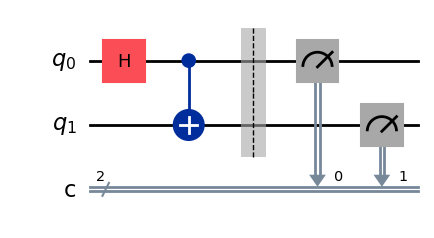

In [ ]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.barrier()
#qc.measure(0, 0)
#qc.measure(1, 1)
qc.measure([0, 1], [0, 1])
qc.draw('mpl')


Criando o simulador
Transpile ira fazer a transpilacao para este simulador
shots è a quantidade de vezes que executa a simulacao que da uma sequencia de bits como resultado
Resultado sera um dicionario com a sequencia de bits resultantes e a frequencia

In [ ]:
simulador = AerSimulator()
tqc = transpile(qc, simulador)
job = simulador.run(tqc, shots=1000)
result = job.result()
counts = result.get_counts(qc)
print(counts)

{'11': 503, '00': 497}


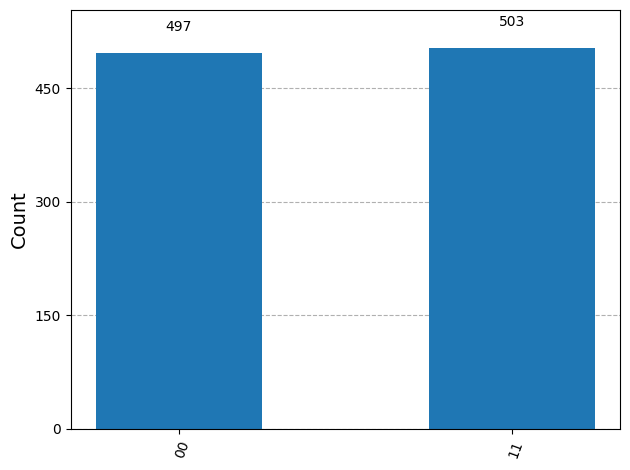

In [ ]:
plot_histogram(counts)